<a href="https://colab.research.google.com/github/Vakhranev/MDB/blob/main/%D0%93%D0%B5%D0%B9%D0%BC%D1%81-%D0%A5%D0%B0%D1%83%D1%8D%D0%BB%D0%BB%20%D0%B4%D0%BB%D1%8F%20%D0%BA%D0%BE%D0%BB%D0%B8%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0%20%D1%81%D0%BB%D0%BE%D0%B3%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pymorphy2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 71.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13706 sha256=5ea2e53f8cf98183c0a547d98be4db5f0b6c1066c0d1e18c23bafda96fa8d492
  Stored in directory: /root/.cache/pip/wheels/fc/ab/d4/5da2067ac95b36618c629a5f93f809425700506f72c9732fac
Successfully built docopt


In [5]:
import os
import glob
import pymorphy2
import matplotlib.pyplot as plt

# Создаем экземпляр класса MorphAnalyzer для работы с морфологией русского языка
morph = pymorphy2.MorphAnalyzer()

# Путь к папке с уровнями CEFR
cefr_levels = ["A1", "A2", "B1", "B2"]

# Обработка каждого уровня CEFR
for cefr_level in cefr_levels:
    folder_path = f"/content/Students_texts/{cefr_level}"
    file_list = glob.glob(os.path.join(folder_path, "*.txt"))

    avg_vowel_counts = []

    # Обработка каждого файла в текущем уровне CEFR
    for file_path in file_list:
        with open(file_path, 'r') as file:
            text = file.read()
            tokens = text.split()

            total_vowel_count = 0
            token_count = 0

            # Вычисляем количество гласных букв для каждого токена
            for token in tokens:
                parsed_token = morph.parse(token)[0]

                # Проверяем, есть ли нормализованная форма слова
                if parsed_token.normal_form is not None:
                    normalized_word = parsed_token.normal_form
                    vowel_count = sum(letter in 'аеёиоуыэюя' for letter in normalized_word.lower())
                    total_vowel_count += vowel_count
                    token_count += 1

            # Среднее количество гласных букв для файла
            avg_vowel_count = total_vowel_count / token_count if token_count > 0 else 0
            avg_vowel_counts.append(avg_vowel_count)

    # Среднее значение для текущего уровня CEFR
    avg_for_cefr = sum(avg_vowel_counts) / len(avg_vowel_counts)
    print(f"Среднее количество гласных букв для уровня {cefr_level}: {avg_for_cefr:.2f}")

Среднее количество гласных букв для уровня A1: 1.75
Среднее количество гласных букв для уровня A2: 1.83
Среднее количество гласных букв для уровня B1: 1.94
Среднее количество гласных букв для уровня B2: 2.04


In [6]:
import os
import glob
import numpy as np
import pingouin as pg
import pandas as pd
import pymorphy2

# Создаем экземпляр класса MorphAnalyzer для работы с морфологией русского языка
morph = pymorphy2.MorphAnalyzer()

# Путь к папке с уровнями CEFR
cefr_levels = ["A1", "A2", "B1", "B2"]

# Создаем DataFrame для хранения данных
data = pd.DataFrame()

# Список для хранения количества гласных во всех токенах
all_vowel_counts = []

# Обработка каждого уровня CEFR
for cefr_level in cefr_levels:
    folder_path = f"/content/Students_texts/{cefr_level}"
    file_list = glob.glob(os.path.join(folder_path, "*.txt"))

    # Список для хранения средних значений количества гласных в токене в текущем уровне CEFR
    avg_vowel_counts = []

    # Обработка каждого файла в текущем уровне CEFR
    for file_path in file_list:
        with open(file_path, 'r') as file:
            text = file.read()
            tokens = text.split()

            total_vowel_count = 0
            token_count = 0

            # Вычисляем количество гласных букв для каждого токена
            for token in tokens:
                parsed_token = morph.parse(token)[0]

                # Проверяем, есть ли нормализованная форма слова
                if parsed_token.normal_form is not None:
                    normalized_word = parsed_token.normal_form
                    vowel_count = sum(letter in 'аеёиоуыэюя' for letter in normalized_word.lower())
                    total_vowel_count += vowel_count
                    token_count += 1

                # Сохраняем количество гласных для каждого токена
                all_vowel_counts.append(vowel_count)

            # Среднее количество гласных букв для файла
            avg_vowel_count = total_vowel_count / token_count if token_count > 0 else 0
            avg_vowel_counts.append(avg_vowel_count)

    # Создаем временный DataFrame для текущего уровня CEFR
    temp_df = pd.DataFrame({cefr_level: avg_vowel_counts})

    # Объединяем временный DataFrame с общим DataFrame
    data = pd.concat([data, temp_df], axis=1)

# Вычисление статистик для количества гласных во всех токенах
mean_vowel_count = np.mean(all_vowel_counts)
sd_vowel_count = np.std(all_vowel_counts)
std_error_vowel_count = stats.sem(all_vowel_counts)
ci_vowel_count = stats.t.interval(0.95, len(all_vowel_counts)-1, loc=mean_vowel_count, scale=std_error_vowel_count)

# Вывод статистик для количества гласных во всех токенах
print("Статистики для количества гласных во всех токенах:")
print(f"Mean: {mean_vowel_count}")
print(f"SD: {sd_vowel_count}")
print(f"Std. Error: {std_error_vowel_count}")
print(f"95% CI (confidence interval) (mean): {ci_vowel_count}\n")

# Проводим однофакторный дисперсионный анализ (ANOVA)
aov = pg.anova(dv='value', between='group', data=pd.melt(data, var_name='group', value_name='value'), detailed=True)

# Выводим только F-статистику и p-value
print(f"F-статистика (ANOVA): {aov['F'][0]}")
print(f"p-value (ANOVA): {aov['p-unc'][0]}")

# Преобразуем данные в нужный формат для теста Геймса-Хауэла
long_data = pd.melt(data, var_name='CEFR Level', value_name='Average Vowel Count')

# Выполняем тест Геймса-Хауэла
result = pg.pairwise_gameshowell(data=long_data, dv='Average Vowel Count', between='CEFR Level')

# Вывод результатов теста Геймса-Хауэла
print(result)

Статистики для количества гласных во всех токенах:
Mean: 1.9082497321515535
SD: 1.2031155387807309
Std. Error: 0.0027986621698678593
95% CI (confidence interval) (mean): (1.9027644191681286, 1.9137350451349784)

F-статистика (ANOVA): 65.83545900107352
p-value (ANOVA): 3.905087520805518e-39
    A   B   mean(A)   mean(B)      diff        se          T          df  \
0  A1  A2  1.749754  1.833448 -0.083694  0.032516  -2.573943   72.135241   
1  A1  B1  1.749754  1.940048 -0.190294  0.032370  -5.878718   70.865441   
2  A1  B2  1.749754  2.043988 -0.294234  0.034824  -8.449193   92.414095   
3  A2  B1  1.833448  1.940048 -0.106600  0.012065  -8.835383  896.142046   
4  A2  B2  1.833448  2.043988 -0.210540  0.017620 -11.949079  216.896667   
5  B1  B2  1.940048  2.043988 -0.103940  0.017349  -5.991224  205.641673   

           pval    hedges  
0  5.732806e-02 -0.432094  
1  7.362416e-07 -1.009965  
2  2.369438e-12 -1.461955  
3  0.000000e+00 -0.587227  
4  0.000000e+00 -1.157857  
5  5.500

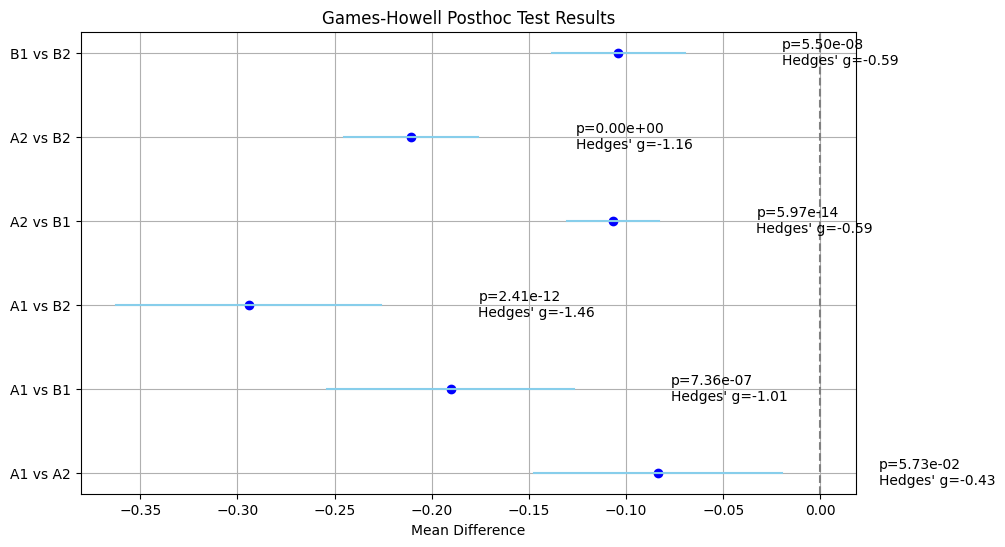

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Результаты теста Геймса-Хауэла
results = pd.DataFrame({
    'group1': ['A1', 'A1', 'A1', 'A2', 'A2', 'B1'],
    'group2': ['A2', 'B1', 'B2', 'B1', 'B2', 'B2'],
    'mean(A)': [1.749754, 1.749754, 1.749754, 1.833448, 1.833448, 1.940048],
    'mean(B)': [1.833448, 1.940048, 2.043988, 1.940048, 2.043988, 2.043988],
    'diff': [-0.083694, -0.190294, -0.294234, -0.106600, -0.210540, -0.103940],
    'se': [0.032516, 0.032370, 0.034824, 0.012065, 0.017620, 0.017349],
    'T': [-2.573943, -5.878718, -8.449193, -8.835383, -11.949079, -5.991224],
    'df': [72.135241, 70.865441, 92.414095, 896.142046, 216.896667, 205.641673],
    'pval': [5.732806e-02, 7.362416e-07, 2.405298e-12, 5.973000e-14, 0.000000e+00, 5.500539e-08],
    'hedges': [-0.432094, -1.009965, -1.461955, -0.587227, -1.157857, -0.585654]
})

# Расчет доверительных интервалов
z_score = 1.96
conf_intervals = [
    (md - z_score * s, md + z_score * s) for md, s in zip(results['diff'], results['se'])
]

# Построение графика
plt.figure(figsize=(10, 6))
for i, (group, ci, p, h) in enumerate(
    zip(results['group1'] + ' vs ' + results['group2'], conf_intervals, results['pval'], results['hedges'])
):
    plt.plot(ci, [i, i], color="skyblue")
    plt.scatter(results['diff'].iloc[i], i, color="blue")
    plt.text(ci[1] + 0.05, i, f"p={p:.2e}\nHedges' g={h:.2f}", va='center')

# Элементы оформления
plt.yticks(range(len(results)), results['group1'] + ' vs ' + results['group2'])
plt.axvline(0, color='grey', linestyle='--')
plt.xlabel("Mean Difference")
plt.title("Games-Howell Posthoc Test Results")
plt.grid(True)
plt.show()